In [1]:
import cfgrib as cf
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset('data-temp/mescan-surfex-nordics-temperature-2000.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:  (height: 1, lat: 364, lon: 329, time: 1464)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-12-31T18:00:00
  * lon      (lon) float32 4.5 4.5835867 4.6671734 ... 31.832827 31.916414
  * lat      (lat) float32 53.5 53.549587 53.599174 ... 71.400826 71.45042 71.5
  * height   (height) float64 2.0
Data variables:
    2t       (time, height, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Fri May 24 00:08:11 2019: cdo -f nc remapbil,outgrid_nordic...
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

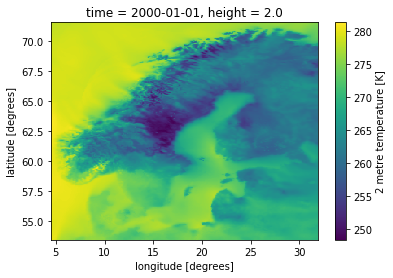

In [4]:
ds['2t'][0,:,:].plot()

# Monthly Averages and Standard Deviation

In [2]:
!cdo -ymonmean -addc,-273.15 -select,name=2t -cat './data-temp/mescan-surfex-nordics-temperature-????.nc'  ./data-temp/mescan-surfex-nordics-temperature-ymon.nc

cdo ymonmean: Started child process "addc,-273.15 -select,name=2t -cat ./data-temp/mescan-surfex-nordics-temperature-????.nc (pipe1.1)".
cdo(2) addc: Started child process "select,name=2t -cat ./data-temp/mescan-surfex-nordics-temperature-????.nc (pipe2.1)".
cdo(3) select: Started child process "cat ./data-temp/mescan-surfex-nordics-temperature-????.nc (pipe3.1)".
cdo(4) cat:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 910cdo(4) cat: Processed 2449728736 values from 14 variables over 20456 timesteps [31.93s]
cdo(3) select: Processed 2449728736 values from 1 variable over 20456 timesteps [31.95s]
cdo(2) addc: Processed 2449728736 values from 1 variable over 20456 timesteps [31.95s]
cdo ymonmean: Processed 2449728736 values from 1 variable over 20456 timesteps [31.95s 61MB]


In [3]:
!cdo -b 32 ymonstd -addc,-273.15 -select,name=2t -cat './data-temp/mescan-surfex-nordics-temperature-????.nc' ./data-temp/mescan-surfex-nordics-t2m_ymonstd.nc

cdo ymonstd: Started child process "addc,-273.15 -select,name=2t -cat ./data-temp/mescan-surfex-nordics-temperature-????.nc (pipe1.1)".
cdo(2) addc: Started child process "select,name=2t -cat ./data-temp/mescan-surfex-nordics-temperature-????.nc (pipe2.1)".
cdo(3) select: Started child process "cat ./data-temp/mescan-surfex-nordics-temperature-????.nc (pipe3.1)".
cdo(4) cat:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 910cdo(4) cat: Processed 2451165808 values from 15 variables over 20468 timesteps [35.04s]
cdo(3) select: Processed 2451165808 values from 1 variable over 20468 timesteps [35.06s]
cdo(2) addc: Processed 2451165808 values from 1 variable over 20468 timesteps [35.06s]
cdo ymonstd: Processed 2451165808 values from 1 variable over 20468 timesteps [35.06s 71MB]


# Daily Aggregation (Mean, Min, Max)

In [8]:
!cdo -b 32 daymean -addc,-273.15 -select,name=2t -cat './data-temp/mescan-surfex-nordics-temperature-????.nc' ./data-temp/mescan-surfex-nordics-t2m_daily.nc

cdo daymean: Started child process "addc,-273.15 -select,name=2t -cat ./data-temp/mescan-surfex-nordics-temperature-????.nc (pipe1.1)".
cdo(2) addc: Started child process "select,name=2t -cat ./data-temp/mescan-surfex-nordics-temperature-????.nc (pipe2.1)".
cdo(3) select: Started child process "cat ./data-temp/mescan-surfex-nordics-temperature-????.nc (pipe3.1)".
cdo(4) cat:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 910cdo(4) cat: Processed 2451165808 values from 15 variables over 20468 timesteps [37.48s]
cdo(3) select: Processed 2451165808 values from 1 variable over 20468 timesteps [37.49s]
cdo(2) addc: Processed 2451165808 values from 1 variable over 20468 timesteps [37.49s]
cdo daymean: Processed 2451165808 values from 1 variable over 20468 timesteps [37.49s 53MB]


In [7]:
!cdo -b 32 daymin -select,name=2t -cat './data-temp/mescan-surfex-nordics-temperature-????.nc' ./data-temp/mescan-surfex-nordics-t2m_daily_min.nc

cdo daymin: Started child process "select,name=2t -cat ./data-temp/mescan-surfex-nordics-temperature-????.nc (pipe1.1)".
cdo(2) select: Started child process "cat ./data-temp/mescan-surfex-nordics-temperature-????.nc (pipe2.1)".
cdo(3) cat:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 910cdo(3) cat: Processed 2451165808 values from 15 variables over 20468 timesteps [27.26s]
cdo(2) select: Processed 2451165808 values from 1 variable over 20468 timesteps [27.26s]
cdo daymin: Processed 2451165808 values from 1 variable over 20468 timesteps [27.26s 51MB]


In [6]:
!cdo -b 32 daymax -select,name=2t -cat './data-temp/mescan-surfex-nordics-temperature-????.nc' ./data-temp/mescan-surfex-nordics-t2m_daily_max.nc

cdo daymax: Started child process "select,name=2t -cat ./data-temp/mescan-surfex-nordics-temperature-????.nc (pipe1.1)".
cdo(2) select: Started child process "cat ./data-temp/mescan-surfex-nordics-temperature-????.nc (pipe2.1)".
cdo(3) cat:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 910cdo(3) cat: Processed 2451165808 values from 15 variables over 20468 timesteps [26.19s]
cdo(2) select: Processed 2451165808 values from 1 variable over 20468 timesteps [26.19s]
cdo daymax: Processed 2451165808 values from 1 variable over 20468 timesteps [26.19s 51MB]


In [ ]:
!cdo info ./data-temp/mescan-surfex-nordics-t2m_daily_max.nc

# Freezing degree days

In [7]:
!cdo -b 32 daymin -select,name=2t -cat './data-temp/mescan-surfex-nordics-temperature-*.nc' ./data-temp/mescan-surfex-nordics-t2m_k_daily_min.nc

cdo daymin: Started child process "select,name=2t -cat ./data-temp/mescan-surfex-nordics-temperature-*.nc (pipe1.1)".
cdo(2) select: Started child process "cat ./data-temp/mescan-surfex-nordics-temperature-*.nc (pipe2.1)".
cdo(3) cat:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 910cdo(3) cat: Processed 2451165808 values from 15 variables over 20468 timesteps [25.26s]
cdo(2) select: Processed 2451165808 values from 1 variable over 20468 timesteps [25.26s]
cdo daymin: Processed 2451165808 values from 1 variable over 20468 timesteps [25.26s 53MB]


# Consecutive frost days index per time period

In [9]:
!cdo eca_cfd ./data-temp/mescan-surfex-nordics-t2m_daily_min.nc ./data-temp/mescan-surfex-nordics-eca_cfd.nc

cdo eca_cfd: Processed 613869256 values from 1 variable over 5126 timesteps [15.63s 52MB]


# Consecutive summer days index per time period

In [10]:
!cdo eca_csu ./data-temp/mescan-surfex-nordics-t2m_daily_max.nc ./data-temp/mescan-surfex-nordics-eca_csu.nc

cdo eca_csu: Processed 613869256 values from 1 variable over 5126 timesteps [15.26s 53MB]


# Frost days index per time period

In [11]:
!cdo eca_fd ./data-temp/mescan-surfex-nordics-t2m_daily_min.nc ./data-temp/mescan-surfex-nordics-eca_fd.nc

cdo eca_fd: Processed 613869256 values from 1 variable over 5126 timesteps [9.76s 50MB]


# Heating degree days per time period

In [12]:
!cdo eca_hd ./data-temp/mescan-surfex-nordics-t2m_daily.nc ./data-temp/mescan-surfex-nordics-eca_hd.nc

cdo eca_hd: Processed 613869256 values from 1 variable over 5126 timesteps [7.50s 49MB]


# Ice days index per time period

In [13]:
!cdo eca_id ./data-temp/mescan-surfex-nordics-t2m_daily_max.nc ./data-temp/mescan-surfex-nordics-eca_id.nc

cdo eca_id: Processed 613869256 values from 1 variable over 5126 timesteps [9.76s 51MB]


# Summer days index per time period

In [14]:
!cdo eca_su ./data-temp/mescan-surfex-nordics-t2m_daily_max.nc ./data-temp/mescan-surfex-nordics-eca_su.nc

cdo eca_su: Processed 613869256 values from 1 variable over 5126 timesteps [8.39s 50MB]


# Tropical nights index per time period

In [15]:
!cdo eca_tr ./data-temp/mescan-surfex-nordics-t2m_daily_min.nc ./data-temp/mescan-surfex-nordics-eca_tr.nc

cdo eca_tr: Processed 613869256 values from 1 variable over 5126 timesteps [8.55s 50MB]


# Copy results into Azure Storage

In [1]:
!cp ./data-temp/mescan-surfex-nordics-temperature-ymon.nc /data-uerra/mescan-surfex/temperature/

In [3]:
!cp ./data-temp/mescan-surfex-nordics-t2m_ymonstd.nc /data-uerra/mescan-surfex/temperature/

In [2]:
!cp ./data-temp/mescan-surfex-nordics-t2m_daily.nc /data-uerra/mescan-surfex/temperature

In [4]:
!cp ./data-temp/mescan-surfex-nordics-t2m_daily_min.nc /data-uerra/mescan-surfex/temperature

In [5]:
!cp ./data-temp/mescan-surfex-nordics-t2m_daily_max.nc /data-uerra/mescan-surfex/temperature

In [8]:
!cp ./data-temp/mescan-surfex-nordics-t2m_k_daily_min.nc /data-uerra/mescan-surfex/temperature

In [16]:
!cp ./data-temp/mescan-surfex-nordics-eca*.nc /data-uerra/mescan-surfex/temperature

In [1]:
!ls /data-uerra/mescan-surfex/temperature

mescan-surfex-finland-temperature-2000.nc
mescan-surfex-finland-temperature-2001.nc
mescan-surfex-finland-temperature-2002.nc
mescan-surfex-finland-temperature-2003.nc
mescan-surfex-finland-temperature-2005.nc
mescan-surfex-finland-temperature-2006.nc
mescan-surfex-finland-temperature-2007.nc
mescan-surfex-finland-temperature-2008.nc
mescan-surfex-finland-temperature-2009.nc
mescan-surfex-finland-temperature-2010.nc
mescan-surfex-finland-temperature-2011.nc
mescan-surfex-finland-temperature-2012.nc
mescan-surfex-finland-temperature-2013.nc
mescan-surfex-finland-temperature-2014.nc
mescan-surfex-nordics-eca_cfd.nc
mescan-surfex-nordics-eca_csu.nc
mescan-surfex-nordics-eca_fd.nc
mescan-surfex-nordics-eca_hd.nc
mescan-surfex-nordics-eca_id.nc
mescan-surfex-nordics-eca_su.nc
mescan-surfex-nordics-eca_tr.nc
mescan-surfex-nordics-t2m_daily_max.nc
mescan-surfex-nordics-t2m_daily_min.nc
mescan-surfex-nordics-t2m_daily.nc
mescan-surfex-nordics-t2m_k_daily_min.nc
mescan-surfex-nordics-t2m_ymonst